<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Imbalanced_Data_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imbalanced data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
import matplotlib.image as mpimg
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import sklearn.metrics as metrics

from sklearn.utils import class_weight

import re


pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [ ]:
# Import customer satisfaction datataset

dataset = pd.read_csv('bank.csv',delimiter=';')
dataset.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Data Inladen:

bank.csv is een marketing dataset met klantinformatie en binary classification (y kolom: 0 = geen deposito, 1 = deposito).

Waarom belangrijk?

Deze dataset is ongebalanceerd, wat invloed kan hebben op de prestaties van je model.

<Axes: xlabel='y', ylabel='count'>

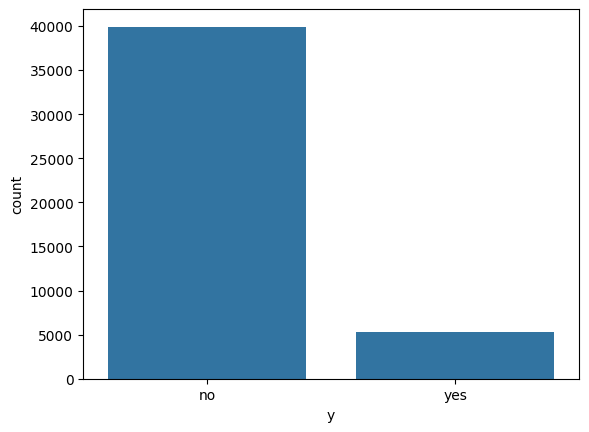

In [ ]:
sns.countplot(x='y',data=dataset)

In [ ]:
# removing duration feature

dataset.drop('duration',axis=1, inplace=True)



Waarom?

duration is een leakage feature, omdat het de gespreksduur bevat, wat sterk correleert met de kans op een positief resultaat (y).



In [ ]:
# yes -> 1 and no -> 0

dataset.y.replace({'no':0,'yes':1},inplace=True)
dataset.loan.replace({'no':0,'yes':1},inplace=True)
dataset.default.replace({'no':0,'yes':1},inplace=True)
dataset.housing.replace({'no':0,'yes':1},inplace=True)

<ipython-input-5-243a3b73421b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.y.replace({'no':0,'yes':1},inplace=True)
<ipython-input-5-243a3b73421b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.y.replace({'no':0,'yes':1},inplace=True)
<ipython-input-5-243a3b73421b>:4: FutureWa

Wat gebeurt hier?

Zet tekstuele waarden (yes, no) om in binaire waarden (0, 1).

Waarom belangrijk?

Machine learning modellen werken beter met numerieke d

In [ ]:
# One-hot encoding

# job
dataset = pd.concat([dataset,pd.get_dummies(dataset['job'], prefix='job')],axis=1)
dataset.drop(['job'],axis=1, inplace=True)

# marital
dataset = pd.concat([dataset,pd.get_dummies(dataset['marital'], prefix='marital')],axis=1)
dataset.drop(['marital'],axis=1, inplace=True)

# education
dataset = pd.concat([dataset,pd.get_dummies(dataset['education'], prefix='education')],axis=1)
dataset.drop(['education'],axis=1, inplace=True)

# contact
dataset = pd.concat([dataset,pd.get_dummies(dataset['contact'], prefix='contact')],axis=1)
dataset.drop(['contact'],axis=1, inplace=True)

# month
dataset = pd.concat([dataset,pd.get_dummies(dataset['month'], prefix='month')],axis=1)
dataset.drop(['month'],axis=1, inplace=True)

# poutcome
dataset = pd.concat([dataset,pd.get_dummies(dataset['poutcome'], prefix='poutcome')],axis=1)
dataset.drop(['poutcome'],axis=1, inplace=True)

Wat gebeurt hier?

Voert One-Hot Encoding uit voor categorische features.

Waarom belangrijk?

Zorgt ervoor dat categorische variabelen worden omgezet naar binaire features, wat essentieel is voor lineaire modellen zoals Logistic Regression.

In [ ]:
# Split features and targets

y = dataset.y.values
X = dataset.drop('y',axis=1)

print(X.shape)
print(y.shape)

(45211, 47)
(45211,)


In [ ]:
# Split into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, random_state =0)


In [ ]:
# MinMax scaling


X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8824
           1       0.62      0.18      0.27      1176

    accuracy                           0.89     10000
   macro avg       0.76      0.58      0.61     10000
weighted avg       0.87      0.89      0.86     10000

[[8694  130]
 [ 968  208]]
89.02


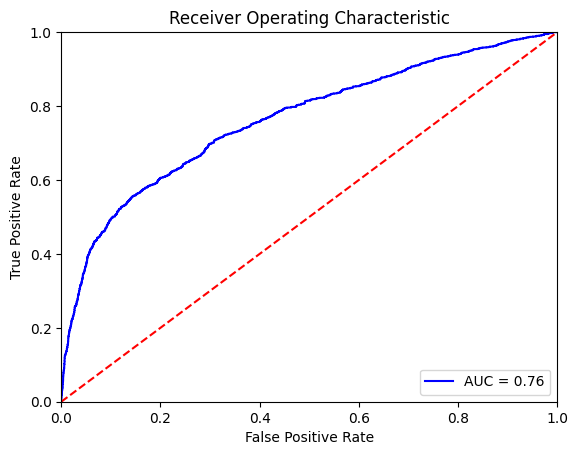

In [ ]:
# Logistic regression

model = LogisticRegression(C=1, solver='liblinear')

# train

model.fit(X_train,y_train)

# test

y_pred = model.predict(X_test)


print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100)

# ROC
probs = model.predict_proba(X_test)
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C = 1: Matige regularisatie.

Solver: liblinear is efficiënt voor kleinere datasets. Classification Report: Precision, Recall, F1-Score.

Confusion Matrix: Correcte en incorrecte voorspellingen.

Accuracy: Percentage correcte voorspellingen ROC Curve: Toont de trade-off tussen true positives en false positives.

AUC Score: Gebied onder de ROC curve, maat voor modelkwaliteit.



In [ ]:
model.predict_proba(X_test)

array([[0.96372853, 0.03627147],
       [0.82709415, 0.17290585],
       [0.95765611, 0.04234389],
       ...,
       [0.92293797, 0.07706203],
       [0.95776658, 0.04223342],
       [0.9370383 , 0.0629617 ]])

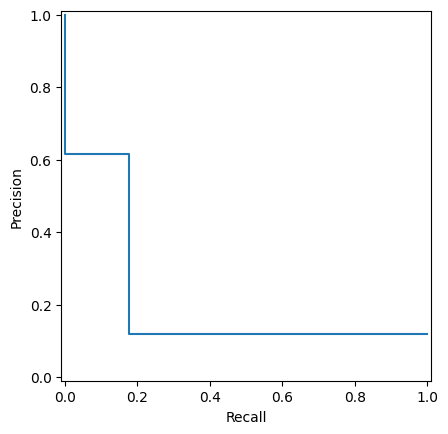

In [ ]:
# Precision - Recall

precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### **Precision-Recall Curve Uitleg**

```python
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
```

---

#### **1. Wat is een Precision-Recall Curve?**

Een **Precision-Recall (PR) Curve** toont de relatie tussen **Precision** (positieve voorspellingen die correct waren) en **Recall** (werkelijke positieve gevallen die correct zijn voorspeld) bij verschillende **thresholds**. Dit is vooral nuttig bij **ongebalanceerde** datasets zoals in de **bank** dataset, waar de meerderheidsklasse (geen deposito) veel groter is dan de minderheidsklasse (wel deposito).

---

#### **2. Begrippen (Precision, Recall)**

* **Precision (Positieve Voorspellende Waarde)**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

* **Recall (True Positive Rate, Sensitivity)**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

* **True Positives (TP)**: Correct positief geclassificeerde samples.
* **False Positives (FP)**: Negatief sample foutief als positief geclassificeerd.
* **False Negatives (FN)**: Positief sample foutief als negatief geclassificeerd.

---

#### **3. Code Uitleg**

##### **Berekenen van Precision en Recall bij Verschillende Thresholds**

```python
precision, recall, _ = precision_recall_curve(y_test, y_pred)
```

* **`precision_recall_curve()`** neemt als input:

  * **`y_test`**: De werkelijke labels.
  * **`y_pred`**: De binaire voorspellingen (0 of 1).

* **Output:**

  * **`precision`**: Lijst met precision waarden bij verschillende thresholds.
  * **`recall`**: Lijst met recall waarden bij dezelfde thresholds.
  * **`_`**: De gebruikte thresholds (niet nodig voor de plot).

---

##### **Plotten van de Precision-Recall Curve**

```python
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
```

* **PrecisionRecallDisplay:**

  * Een handige class in **scikit-learn** om de precision-recall curve te plotten.
* **Waarom belangrijk?**

  * Laat zien hoe je model presteert bij verschillende **thresholds**.
* **Typische Uitslag:**

  * **Hoge Precision, Lage Recall:** Je model is **voorzichtig** (weinig false positives).
  * **Hoge Recall, Lage Precision:** Je model is **agressief** (veel false positives).

---

#### **4. Wat je moet Verwachten in de Plot**

* **Perfect Model:** Precision blijft **1.0** tot recall **1.0** bereikt.
* **Slecht Model:** Precision en recall dalen snel, geen duidelijke scheiding.
* **Gebalanceerd Model:** Goede balans tussen precision en recall, met een **gladde** curve.

---

#### **5. Alternatief: Precision-Recall AUC**

Als je de **area under the curve (AUC)** van je precision-recall curve wilt weten:

```python
from sklearn.metrics import auc
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)
```

* **Waarom belangrijk?**

  * Een hogere AUC betekent een beter presterend model.

---




## Classweight balancing

As the data is unbalanced, the neural netwerk tends to have a preference for the majority class.
One of the approaches is to use classweight balancing. This means that during the training phase, a misclassification of a sample from the minority class results in a higher loss.



              precision    recall  f1-score   support

           0       0.96      0.20      0.34      8824
           1       0.14      0.94      0.24      1176

    accuracy                           0.29     10000
   macro avg       0.55      0.57      0.29     10000
weighted avg       0.86      0.29      0.33     10000

[[1805 7019]
 [  74 1102]]
29.07


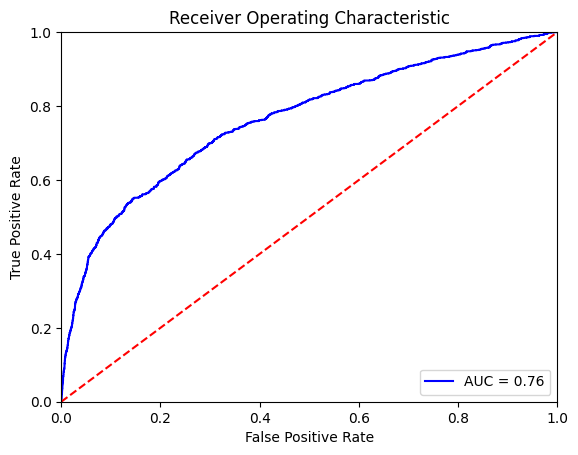

In [ ]:
# Logistic regression

model = LogisticRegression(C=1, solver='liblinear',class_weight={0:1,1:25})

# train

model.fit(X_train,y_train)

# test

y_pred = model.predict(X_test)


print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100)

# ROC
probs = model.predict_proba(X_test)
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Logistic regression met class weight balancing

model = LogisticRegression(C=1, solver='liblinear', class_weight={0: 1, 1: 25})

# Train het model
model.fit(X_train, y_train)

# Test het model
y_pred = model.predict(X_test)

# Evaluatie
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
Wat gebeurt hier?

Het model krijgt een hogere straf (25x) voor fouten in de minderheidsklasse (1), vergeleken met de meerderheidsklasse (0).

Waarom deze verhouding (1:25)?

Deze waarde is meestal gebaseerd op de verhouding van je dataset, maar kan ook experimenteel bepaald worden. Effect:

Verhoogt meestal de Recall en Precision voor de minderheidsklasse.

Nadeel:

Kan leiden tot meer false positives



## Undersampling with Tomek links





              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8824
           1       0.58      0.23      0.33      1176

    accuracy                           0.89     10000
   macro avg       0.74      0.60      0.63     10000
weighted avg       0.87      0.89      0.87     10000

[[8626  198]
 [ 908  268]]
88.94


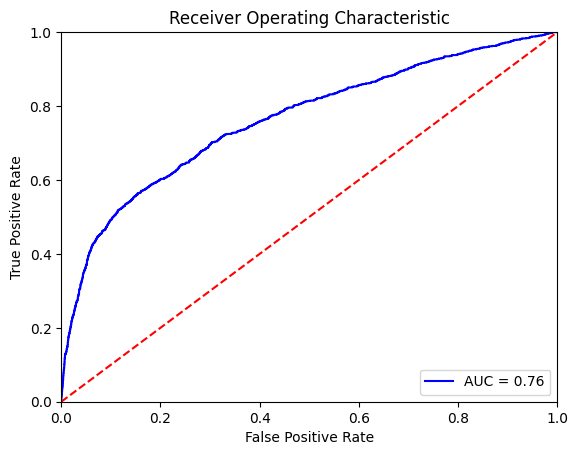

In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_resampled, y_resampled= tl.fit_resample(X_train, y_train)

# Logistic regression

model = LogisticRegression(C=1, solver='liblinear')

# train

model.fit(X_resampled,y_resampled)

# test

y_pred = model.predict(X_test)


print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100)

# ROC
probs = model.predict_proba(X_test)
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



2. Undersampling met Tomek Links
Wat zijn Tomek Links?
Tomek Links zijn paar samples, waarbij een meerderheidsklasse sample de nabijheid van een minderheidsklasse sample verstoort.

Het verwijderen van deze links maakt de scheidingslijn duidelijker voor je model.

Wat gebeurt hier?

fit_resample() verwijdert Tomek links uit de training set.

Dit vermindert de overlapping tussen klassen.

Effect:

Vermindert overlapping tussen klassen.

Nadeel:

Kan veel minderheidsklasse samples verwijderen als de klassen sterk overlappen.



In [ ]:
! pip install imblearn

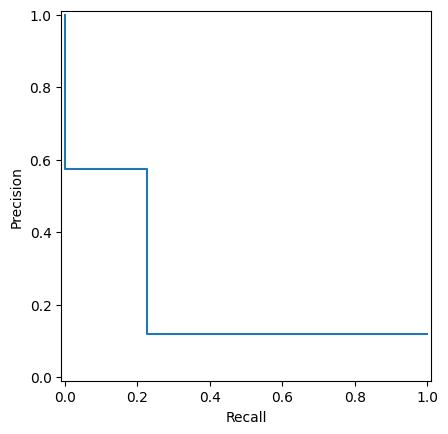

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

## Oversampling met SMOTE

Another way of dealing with unbalanced data is to oversample the data. This means that the data will be balanced by creating additional samples from the minority class until equilibrium.

In [ ]:
# Oversampling with SMOTE

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE( ).fit_resample(X_train, y_train)

print(y_resampled.shape)



(62196,)


Wat gebeurt hier?

fit_resample() maakt synthetische samples voor de minderheidsklasse.

Gebalanceerde training set zonder verlies van meerderheidssamples.



              precision    recall  f1-score   support

           0       0.94      0.76      0.84      8824
           1       0.26      0.64      0.37      1176

    accuracy                           0.74     10000
   macro avg       0.60      0.70      0.60     10000
weighted avg       0.86      0.74      0.78     10000

[[6682 2142]
 [ 429  747]]
74.29


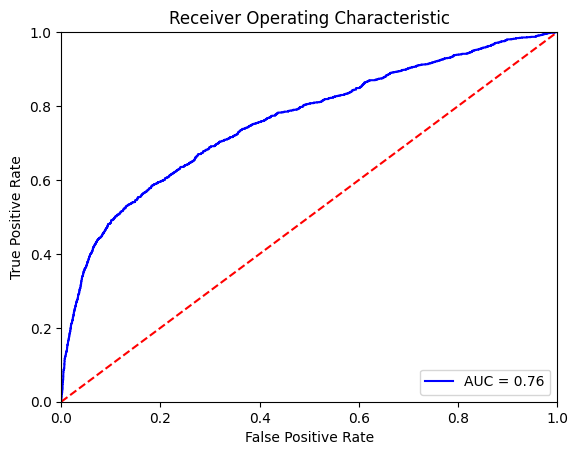

In [ ]:
# Logistic regression

model = LogisticRegression(C=1, solver='liblinear')

# train

model.fit(X_resampled,y_resampled)

# test

y_pred = model.predict(X_test)


print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100)

# ROC
probs = model.predict_proba(X_test)
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Effect:

Verhoogt de Recall aanzienlijk voor de minderheidsklasse.

Nadeel:

Kan leiden tot overfitting als de synthetische samples te dicht bij elkaar liggen.

4. Vergelijking van de Technieken
Methode	Voordeel	Nadeel
Class Weight Balancing	Makkelijk te implementeren	Kan leiden tot hoge false positive rates
Tomek Links	Verwijdert overlapping	Kan waardevolle minderheidsdata verwijderen
SMOTE	Maakt nieuwe samples	Kan overfitting veroorzaken














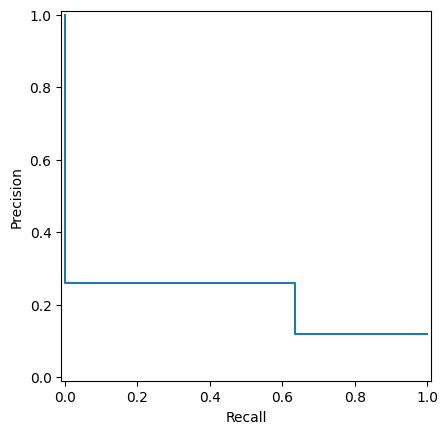

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()